# Face Detection and Recgonesion using Siamese Architecture 
### Dependency 
* Tensorflow for neural network 
* opencv for image process 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
# Imports --1 
import os
import cv2
import matplotlib.pyplot as plt
import random


## Data Collecting and Sorting 

In [4]:
basedir = "/content/gdrive/MyDrive/FaceRecognation/"
POS_PATH = "data/positive"
NEG_PATH = "data/negative"
ANC_PATH = "data/ancore"
# os.system("cd "+basedir+"; tar -xf "+basedir+"lfw.tgz")

In [ ]:
os.path.join(basedir,ANC_PATH)

'/content/gdrive/MyDrive/FaceRecognation/data/ancore'

In [ ]:
# Formation of negative data from dataset 
for dir1 in os.listdir(basedir+"lfw"):
  for file1 in os.listdir(os.path.join(basedir,"lfw", dir1)):
    ex_path = os.path.join(basedir+"lfw", dir1, file1 )
    new_path = os.path.join(basedir, NEG_PATH, file1 )
    
    os.replace (ex_path, new_path)


In [15]:
 # Formation of Positive and ancore data 


video1 = cv2.VideoCapture(basedir+'face_video_2.mp4')
video2 = cv2.VideoCapture(basedir+'face_video_1.mp4')

success, image = video1.read()  
count = 0
while success:  
  cv2.imwrite(os.path.join(basedir, POS_PATH, "frame%d.jpg" % count), image[300:880, 40:620,:]) 
  count+=1
  success, image = video1.read()    


In [60]:
p = len(os.listdir(os.path.join(basedir, POS_PATH)))
n = len(os.listdir(os.path.join(basedir, NEG_PATH)))
a = len(os.listdir(os.path.join(basedir, ANC_PATH)))
a,p,n

(158, 158, 158)

In [11]:
import shutil 

In [18]:
count = 0
l = os.listdir(os.path.join(basedir, POS_PATH))
print(l)
while count < 158:
  i = l.pop(random.randint(0,len(l)-1))
  ex_path = os.path.join(basedir, POS_PATH, i)
  new_path = os.path.join(basedir, ANC_PATH)
  count+=1
  # os.system(f"mv '{ex_path}' '{new_path}'")
  shutil.move(ex_path, new_path) 

['frame15.jpg', 'frame29.jpg', 'frame59.jpg', 'frame62.jpg', 'frame64.jpg', 'frame65.jpg', 'frame100.jpg', 'frame133.jpg', 'frame181.jpg', 'frame197.jpg', 'frame215.jpg', 'frame226.jpg', 'frame241.jpg', 'frame302.jpg', 'frame305.jpg', 'frame309.jpg', 'frame30.jpg', 'frame393.jpg', 'frame394.jpg', 'frame397.jpg', 'frame402.jpg', 'frame405.jpg', 'frame408.jpg', 'frame428.jpg', 'frame444.jpg', 'frame450.jpg', 'frame458.jpg', 'frame480.jpg', 'frame495.jpg', 'frame500.jpg', 'frame506.jpg', 'frame40.jpg', 'frame518.jpg', 'frame519.jpg', 'frame521.jpg', 'frame43.jpg', 'frame543.jpg', 'frame545.jpg', 'frame46.jpg', 'frame61.jpg', 'frame69.jpg', 'frame77.jpg', 'frame85.jpg', 'frame83.jpg', 'frame95.jpg', 'frame108.jpg', 'frame110.jpg', 'frame118.jpg', 'frame123.jpg', 'frame144.jpg', 'frame149.jpg', 'frame156.jpg', 'frame167.jpg', 'frame174.jpg', 'frame176.jpg', 'frame178.jpg', 'frame213.jpg', 'frame214.jpg', 'frame219.jpg', 'frame225.jpg', 'frame269.jpg', 'frame274.jpg', 'frame275.jpg', 'frame2

In [33]:
count = 0
l = os.listdir(os.path.join(basedir, POS_PATH))
length = len(l)

while count < length-158:
  i = l.pop(random.randint(0,len(l)-1))
  ex_path = os.path.join(basedir, POS_PATH, i)
  new_path = os.path.join(basedir, "demo")
  count+=1
  # os.system(f"mv '{ex_path}' '{new_path}'")
  shutil.move(ex_path, new_path) 


## Data Pre Processing 

In [35]:
# imports 
import tensorflow as tf 
    

In [86]:
# Data 
ancore = tf.data.Dataset.list_files(os.path.join(basedir+ANC_PATH, "*.jpg")).take(150)
positive = tf.data.Dataset.list_files(os.path.join(basedir+POS_PATH, "*.jpg")).take(150)
negative = tf.data.Dataset.list_files(os.path.join(basedir+NEG_PATH, "*.jpg")).take(150)

In [87]:
len(ancore)

150

In [88]:
demo = ancore.as_numpy_iterator()
demo.next()

b'/content/gdrive/MyDrive/FaceRecognation/data/ancore/frame114.jpg'

### Pre Process 

In [148]:
def pre_process_img(path):
  # Reading on tensorflow 
  img = tf.io.read_file(path)
  img = tf.io.decode_jpeg(img)
  img = tf.image.resize(img, (200,200))
  img = img/255.0
  return img  


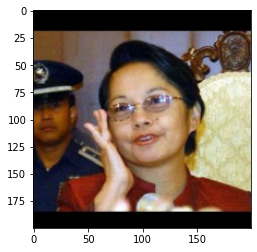

In [165]:
plt.imshow(pre_process_img('/content/gdrive/MyDrive/FaceRecognation/data/negative/Gloria_Macapagal_Arroyo_0029.jpg'))

  #b''

In [150]:
positives = tf.data.Dataset.zip((ancore, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(ancore)))))
negatives = tf.data.Dataset.zip((ancore, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(ancore)))))
data = positives.concatenate(negatives)

In [151]:
f=data.as_numpy_iterator()

In [152]:
f.next()

(b'/content/gdrive/MyDrive/FaceRecognation/data/ancore/frame322.jpg',
 b'/content/gdrive/MyDrive/FaceRecognation/data/positive/frame145.jpg',
 1.0)

In [153]:
def matrix_data_generator(*data):
  # return (pre_process_img(input), pre_process_img(validation), label )
  return (pre_process_img(data[0]), pre_process_img(data[1]), data[2] )

In [157]:
count = 0 
for i in data :
    print(type(matrix_data_generator(*i)))
    count+=1

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class '

InvalidArgumentError: ignored

In [163]:
count, list(data.as_numpy_iterator())[182]

(182,
 (b'/content/gdrive/MyDrive/FaceRecognation/data/ancore/frame303.jpg',
  b'/content/gdrive/MyDrive/FaceRecognation/data/negative/Gloria_Macapagal_Arroyo_0029.jpg',
  0.0))

In [166]:
# Actual Image Data Produce 
data2 = data.map(matrix_data_generator)
data2 = data2.cache()
data2 = data2.shuffle(buffer_size = 1024)

In [130]:
data,data2

(<ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>,
 <ShuffleDataset element_spec=(TensorSpec(shape=(200, 200, None), dtype=tf.float32, name=None), TensorSpec(shape=(200, 200, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>)

In [167]:
type(data2)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [168]:
sample = list(data2.as_numpy_iterator())

InvalidArgumentError: ignored

TypeError: ignored

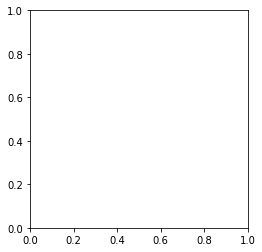

In [52]:
plt.imshow(sample[0])

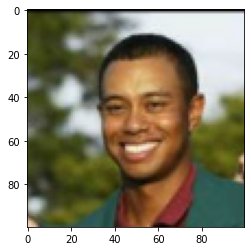

In [ ]:
plt.imshow(sample[1])

In [ ]:
sample[2]

0.0

In [ ]:
len(data)

300

### Train Test Split 

In [ ]:
train_data = data.take(round(len(data)*.8))
train_data = train_data.batch(10)
train_data = train_data.prefetch(8)

In [ ]:
test_data = data.skip(round(len(data)*.8))
test_data = test_data.take(round(len(data)*.2)) 
test_data = train_data.batch(10)
test_data = train_data.prefetch(8)

## Define Model

In [ ]:
# imports 
import tensorflow as tf

In [ ]:
# layers
# Layer, Input, Conv2D, MaxPooling2D, Flatten 3 Dense

In [ ]:
# Building Embding Layer
def make_embedding():
  inp = tf.keras.layers.Input(shape = (200,200,3), name = "Input Image")
  return tf.keras.models.Model

In [ ]:
inp = tf.keras.layers.Input(shape = (200,200,3), name = "Input Image")
inp

<KerasTensor: shape=(None, 200, 200, 3) dtype=float32 (created by layer 'Input Image')>